# Example to generate output from TeukolskyQNMFunctions

In [1]:
## include the source file (if you have not downloaded as a package)

include("../src/TeukolskyQNMFunctions.jl")
import .TeukolskyQNMFunctions as QNM
include("../src/SpectralRadialODE.jl")
import .SpectralRadialODE as RODE
include("../src/Chebyshev.jl")
import .Chebyshev as CH


In [2]:
import Plots
using LaTeXStrings
using Plots
#using PyPlot
using LinearAlgebra
#using GenericSchur
using SparseArrays

In [3]:
T=Float64

nr=10  # number of radial points
nl=20  # number of angular points
s=-2   # field spin
m=2    # m angular value
l=2    # l angular value
n=0    # overtone number
a=T(0.)  # dimensionless black hole spin 
qnm_tolerance=T(1e-10)
coef_tolerance=T(1e-10)
epsilon=T(1e-10)
gamma = T(4)-T(0)*im
bhm = T(1) ## always have unit black hole mass
rmin = T(0) ## location of future null infinity (1/r = ∞)
rmax = abs(a) > 0 ? (bhm / (a^2)) * (1 - sqrt(1 - ((a / bhm)^2))) : 0.5 / bhm
## QNM value near n=0,l=2,m=2, s=-2 for dimensionless spin a=0.7

omega_0= T(0.37367168441804177)-T(0.08896231568893546)*im

0.37367168441804177 - 0.08896231568893546im

In [4]:
omega, lambda, vs, vr, rs = QNM.compute_om(
            nr, nl, s, l, m, a, omega_0,
            tolerance=qnm_tolerance,
            epsilon=epsilon,
            gamma=1.0-a,
            verbose=false
         );
println(omega)
println(lambda)

0.37366249167592097 - 0.08896364900531406im
3.999999999300783 + 1.8014818098677438e-9im


In [5]:
rmax

0.5

In [6]:
radial_mat = RODE.radial_discretized_eqn_c(nr,s,m,a,bhm,omega_0,gamma,rmin,rmax);

In [20]:
mat = Matrix(radial_mat);
nulls = nullspace(mat,rtol=1e-1);
nulls_re = CH.to_real(nulls[:,1]);

In [21]:
nulls

10×2 Matrix{ComplexF64}:
 -0.289599-0.0im            0.486437-0.0im
  0.340052-0.0049254im      0.769267+0.0295824im
  -0.44728-0.00719754im      0.35534+0.134259im
  0.450054+0.0427865im     0.0613106+0.134994im
 -0.308542+0.00980304im   -0.0436235+0.0404431im
  0.386525+0.0816357im    -0.0186531-0.0177087im
 -0.218282-0.00711809im   0.00765941-0.0104856im
  0.263978+0.0532934im    0.00560323+0.00484384im
 -0.105881-0.0118206im   -0.00503655+0.000525471im
  0.113655+0.0114553im    0.00108521-0.00271677im

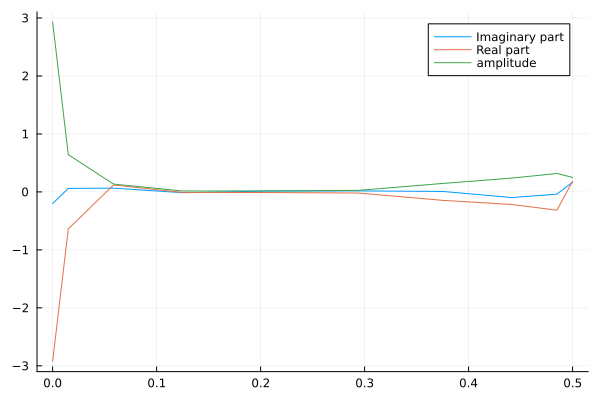

In [22]:
Plots.plot(rs,[v.im for v in nulls_re],label="Imaginary part")
Plots.plot!(rs,[v.re for v in nulls_re],label="Real part")
Plots.plot!(rs,[sqrt(v.re.^2 + v.im.^2) for v in nulls_re],label="amplitude")


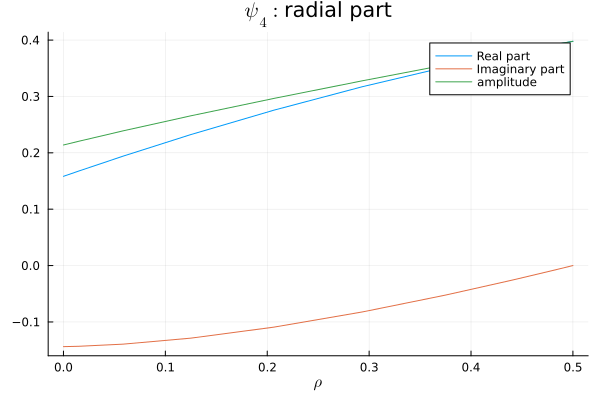

In [33]:
Plots.plot( rs,[v.re for v in vr],label="Real part")
Plots.plot!(rs,[v.im for v in vr],label="Imaginary part")
Plots.plot!(rs,[sqrt(v.re.^2 + v.im.^2) for v in vr],label="amplitude")

Plots.plot!(title=L"\psi_4:"*"radial part", xlabel=L"\rho")

In [15]:
Plots.scatter( [2+i for i in 0:length(vs)-1], [abs(v) for v in vs],xlabel=L"l",ylabel=L"|c_l|",legend=false)
Plots.scatter!(title=L"\psi_4:"*" angular part",yscale=:log)

┌ Warning: No strict ticks found
└ @ PlotUtils /home/hzhu/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/hzhu/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191


In [38]:
using ApproxFun
using SpecialFunctions

In [39]:
a, b = -20, 10
d = a..b;

In [45]:
x

Fun(Chebyshev(-20..10), [-5.0, 15.0])

In [41]:
x = Fun(d);
D = Derivative(d);
L = D^2 - x;

In [42]:
B = Dirichlet(d);

In [43]:
B_vals = [airyai(a), airyai(b)];

In [48]:
u = [B; L] \ [B_vals, 0];